## Introduction to Data Science

## The CRISP-DM approach to Data Science Tasks

_________________________

## I. Business Understanding
                    
#### The Business Understanding phase focuses on understanding the objectives and requirements of the project.  
+ **Determine business objectives**:   Construir um detector de fake news.
+ **Assess situation**:  A detecção de fake news já faz parte do subconsciente do usuário diário da internet. Felizmente podemos traduzir nossa intuição por trás de um título duvidoso e de palavras no imperativo para termos de Machine Learing. 
+ **Determine data mining goals** :  Buscar por sites de notícias que analisam veracidade de notícias, extraindo URLs, manchetes, subtítulos e outras informações pertinentes.
+ **Produce project plan** :  
Avaliar fontes de coleta de dados.
Selecionar critério para confiabilidade de um site.
Coletar e limpar os dados.
Construir e examinar modelo Tfidf.
Averiguar os resultados e reavaliar o modelo.
Revisar o projeto e realizar o deploy.





## II. Data Understanding  

+ Collect initial data:  
+ Describe data:  
+ Explore data:  
+ Verify data quality:  

### Metas!!!

+ Organizar categorias de notícias e os veículos de transmissão
+ Encontrar pessoas/instiuições/temas recorrentes
+ Atentar para caracteres Unicode
+ Determinar filtros (o que vamos armazenar do texto fonte).

In [1]:
#### Basic ####

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Web Tools ####

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

import requests
import urllib
from bs4 import BeautifulSoup as bs

import time

#### Textual Analysis ####

import codecs
import string
import re
from collections import Counter
from collections import defaultdict

import nltk
import networkx as nx
import gensim
from wordcloud import WordCloud
import textract
import pyLDAvis
import spacy
import textstat
import textblob

#### Image Display ####

from IPython.core.display import Image
%matplotlib inline

In [13]:
datapath = "../data"
datapath2 = "../data_2"
class_name_error = "erro-wrapper"
class_name_label = "etiqueta"
url = 'https://piaui.folha.uol.com.br/lupa/tag/verificamos/'


labels = ['VERDADEIRO','VERDADEIRO, MAS','AINDA É CEDO PARA DIZER','EXAGERADO',
          'CONTRADITÓRIO','SUBESTIMADO','FALSO','DE OLHO']


/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
url = 'https://piaui.folha.uol.com.br/lupa/tag/verificamos/'
content = requests.get(url)
print(content.status_code)

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


200


In [4]:
def check_block(bloco):   
    try:
        title = bloco.find_element_by_class_name("bloco-title")
    except:
        return False
    
    verificamos = re.search("\#Verificamos",title.text)
    
    if verificamos is None:
        return False
    else:
        return True

def extract_link(bloco):
    
    return bloco.find_element_by_tag_name("a").get_attribute("href")


def extract_title(texto):
    
    regex = r'Confira.*\n.*(?<=“)(.*)(?=”)'
    
    match = re.search(regex, texto)
    
    if match is None:
        return None
    
    return match.group(1)



def page_out_of_bounds(driver):
    
    penguin = driver.find_elements_by_class_name(class_name_error)
    
    if len(penguin) == 0:
        return False
    else:
        return True
    
def extract_date_and_type(bloco):
    
    info = bloco.find_element_by_class_name('bloco-meta').text
    regex = r'(\d{2}\.\d{2}\.\d{4}).\|.*\|.(.*)'
    
    match = re.search(regex,info)
    date = match.group(1)
    tipo = match.group(2)
    
    return (date,tipo)
    
    

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \#
<>:7: DeprecationWarning: invalid escape sequence \#
<ipython-input-4-bffbf014f4fd>:7: DeprecationWarning: invalid escape sequence \#
  verificamos = re.search("\#Verificamos",title.text)


# Prepare to scrape!

All your data are belong to us

In [55]:
df = pd.DataFrame(columns = ['titulo_original', 'label', 'noticia_completa','veiculo', 'data_publicacao'],
                  dtype= 'string')

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
options = webdriver.chrome.options.Options()
options.headless = True

driver  = webdriver.Chrome(ChromeDriverManager().install(), options = options)
crawler = webdriver.Chrome(ChromeDriverManager().install(), options = options)

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [/home/isaque/.wdm/drivers/chromedriver/linux64/94.0.4606.61/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [/home/isaque/.wdm/drivers/chromedriver/linux64/94.0.4606.61/chromedriver] found in cache


In [8]:
N = 160
index = 0
while True:
    
    page = url + 'page/' + str(N)
    
    driver.get(page)
    
    if page_out_of_bounds(driver):
        break
    blocos = driver.find_elements_by_class_name('bloco')
    
    for bloco in blocos:
        
        if check_block(bloco):
            
        
            link = extract_link(bloco)
            date_tipo = extract_date_and_type(bloco)
            
            crawler.get(link)
            label = crawler.find_element_by_class_name(class_name_label).text
            completo = crawler.find_element_by_class_name("post-inner")
            noticia_completa = completo.text
            noticia_original = extract_title(noticia_completa)
            
            df.loc[index] = [noticia_original,label,noticia_completa ,date_tipo[1],date_tipo[0]]
            index += 1

    N += 1


/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

## Local storage

Rodar célula apenas uma vez

In [15]:
N = 0
i = 0
while True:
    
    page = url + 'page/' + str(N)
    
    driver.get(page)
    
    if page_out_of_bounds(driver):
        break
    blocos = driver.find_elements_by_class_name('bloco')
    
    for bloco in blocos:
        
        if check_block(bloco):
            
        
            link = extract_link(bloco)
            date_tipo = extract_date_and_type(bloco)
            
            crawler.get(link)
            completo = crawler.find_element_by_class_name("post-inner")
            noticia_completa = completo.text
            
            path = datapath + f'/lupa_{i}'
            i += 1
            
            date_str = f'{date_tipo[0]}  {date_tipo[1]}'
            
            with open(path, 'w') as f:
                f.write(date_str + '\n' + noticia_completa)
            
               
            

    N += 1


print('Done!!!')

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Done!!!


Com o local storage:


Criar uma string com todos as noticias completas.

In [8]:
texts = ''

for filename in os.listdir(datapath2):
    filepath = datapath2 + f'/{filename}'
    
    with open(filepath, 'r') as f:
        texts += f.read()
        texts += '\n'


    
len(texts)    


/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5141305

Caso não tenha o nltk em pt

In [7]:
nltk.download('stopwords')

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /home/isaque/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stopwords = nltk.corpus.stopwords.words('portuguese')

uol_freqwords = ['circula', 'lupa', 'verificação', 'editado', 'sobre',
                'assine', 'confira', 'lente', 'newsletter', 'gratuita',
                'texto', 'vídeo', 'notícias', 'meio', 'projeto', 
                'imagem', 'seguir', 'analisada', 'analisado', 'trabalho',
                'dia', 'material', 'sido', 'ser', 'solicitaram', 
                '\u200cde\u200c', '\u200co\u200c','–', 'segundo', 'reportagem']

list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords]
list_words = [l for l in list_words if l not in uol_freqwords]

freqdist = Counter(list_words)
freqdist.most_common(20)

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('facebook', 6709),
 ('redes', 2407),
 ('sociais', 2327),
 ('falso', 2317),
 ('informação', 2168),
 ('pessoas', 1932),
 ('usuários', 1677),
 ('covid-19', 1663),
 ('nota', 1622),
 ('mil', 1614),
 ('falsa', 1581),
 ('bolsonaro', 1566),
 ('presidente', 1515),
 ('federal', 1297),
 ('parte', 1243),
 ('contra', 1238),
 ('brasil', 1185),
 ('2020', 1181),
 ('site', 1150),
 ('foto', 1149)]

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


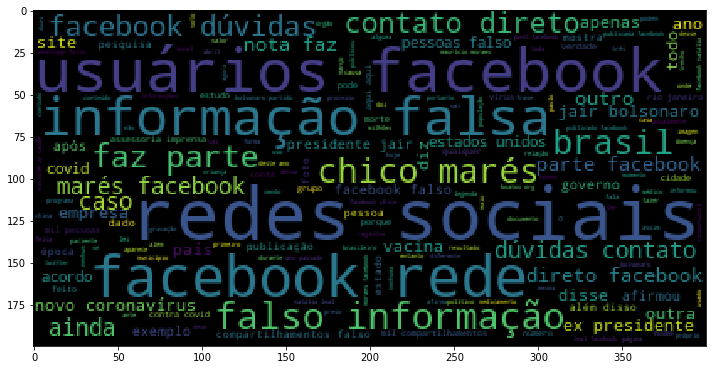

In [10]:
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [11]:
print(freqdist.get('bolsonaro'))
print(freqdist.get('lula'))
print(freqdist.get('trump'))
print(freqdist.get('doria'))

1566
664
196
191


/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Remover "Assine a lupa"

In [4]:
propaganda = 'Assine a Lente, a newsletter gratuita sobre desinformação da Lupa!'

for filename in os.listdir(datapath):
    filepath = datapath + f'/{filename}'
    
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    filepath2 = f'../data_2/{filename}'
    
    with open(filepath2, 'w') as f:
        for line in lines:
            if line.strip('\n') != propaganda:
                f.write(line)
    
        

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Remover "Nota:"

In [6]:
nota = r'Nota:‌ ‌esta‌ ‌reporta.*'
verif = r'Esta‌ ‌verificação ‌foi sugerid.*'

for filename in os.listdir(datapath):
    filepath = datapath + f'/{filename}'
    
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    filepath2 = f'../data_2/{filename}'
    
    with open(filepath2, 'w') as f:
        for line in lines:
            match1 = re.match(nota,line)
            match2 = re.match(verif,line)
            if (match1 is None) and (match2 is None):
                f.write(line)
    

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Regularizar aspas:

In [12]:
for filename in os.listdir(datapath2):
    
    filepath2 = datapath2 + f'/{filename}'
    
    with open(filepath2,'r') as f:     
        lines = f.readlines()
        
    
    filepath3 = f'../data_3/{filename}'
    
    with open(filepath3, 'w') as f:
        for line in lines:
            f.write(line.replace('“','"').replace('”','"'))

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
teste = 'Vacina provoca surto de poliomielite no Sudão'
teste.replace('“','"').replace('”','"')

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Vacina provoca surto de poliomielite no Sudão'

## III. Data Preparation

+ Select data:   
+ Clean data:   
+ Construct data/transform data/feature engineering:   
+ Integrate data:   
+ (Re) Format data:   

Após o local storage, queremos extrair a notícia pelo arquivo de texto bruto.

In [6]:
labels = [r'VERDADEIRO',r'VERDADEIRO, MAS',r'AINDA É CEDO PARA DIZER',r'EXAGERADO',
          r'CONTRADITÓRIO',r'SUBESTIMADO',r'FALSO',r'DE OLHO']

exp = r'(?<=“(.*)(?=”)'

false = 0
not_false = 0

N_matches = 0
for filename in os.listdir(datapath2):
    filepath = datapath2 + f'/{filename}'

    print(20*'-')
    print(f'File {filepath}')
    print(20*'-')

    with open(filepath, 'r') as f:
        text = f.read()
    with open(filepath, 'r') as f:
        lines = f.readlines()
        
        
    for line in lines:
        x = line.strip('\n')
        if x in labels:
            print(line)
            if x == 'FALSO':
                false += 1
            else:
                not_false += 1

    match1 = re.findall(exp, text)

    if match1 is not None:
        N_matches += 1
        Max = ''
        for i in match1:
            if len(i) > len(Max):
                Max = i
        print(Max)


    print(20*'*')

print(f'Numero de matches = {N_matches}')
print(false)
print(not_false)
        
            
    
    
    
    
            
    
    
    

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--------------------
File ../data_2/lupa_42
--------------------
FALSO

O áudio que narra a situação chegou até o grupo [Tirol] com a característica [marcação] ‘encaminhado com frequência’, o que geralmente é uma marca das fake news
********************
--------------------
File ../data_2/lupa_1198
--------------------
FALSO

FALSO

Manifestantes gritam ‘Globo Lixo’ e exigem o impeachment de Gilmar Mendes em São Paulo – Av. Paulista
********************
--------------------
File ../data_2/lupa_16
--------------------
FALSO

In Brazil, embattled President Jair Bolsonaro this month rallied supporters in demonstrations that more than 150 critics, including former heads of state, said in an open letter were “modeled on the insurrection” at the U.S. Capitol”, escreveu o jornal. Em tradução livre: “No Brasil, o presidente Jair Bolsonaro reuniu simpatizantes em manifestações em que mais de 150 críticos, incluindo ex-chefes de Estado, disseram em carta aberta terem sido ‘modeladas na insurreiç

FALSO

FALSO

O documento continua revelando que mulheres vacinadas que estão grávidas podem sofrer abortos espontâneos e outros problemas reprodutivos – e pessoas não vacinadas que entram em contato com elas também podem. As mães vacinadas também podem passar o que quer que esteja contido na injeção Pfizer para seus bebês através do leite materno contaminado
********************
--------------------
File ../data_2/lupa_1116
--------------------
FALSO

Centro do Rio. Olhem que loucura
********************
--------------------
File ../data_2/lupa_827
--------------------
FALSO


********************
--------------------
File ../data_2/lupa_1727
--------------------
FALSO

[Bolsonaro] É um cara que eu confio mesmo. É um cara que trabalha como você, que luta como você, que erra como você e aprende com seus erros, como você
********************
--------------------
File ../data_2/lupa_1517
--------------------
FALSO

FALSO

FALSO

FALSO

[Honduras] é o país com maior taxa de homicídios
***

FALSO

FALSO

(…) [Santa Catarina] Tem hoje a menor taxa de assassinatos
********************
--------------------
File ../data_2/lupa_790
--------------------
FALSO

explosão de casos na China
********************
--------------------
File ../data_2/lupa_1613
--------------------
EXAGERADO

FALSO

FALSO

FALSO

Tornado em Foz do Iguaçu na tarde de hoje, 13.12.2018
********************
--------------------
File ../data_2/lupa_169
--------------------
FALSO

novas evidências clínicas relacionadas ao uso de hidroxicloroquina em indivíduos infectados com SARS-CoV-2 indicaram um risco aumentado de reações adversas em face de poucos ou nenhum benefício
********************
--------------------
File ../data_2/lupa_1688
--------------------
FALSO

criação de um painel artístico de difusão cultural nos segmentos da música, dança e artes cênicas, dentro e fora do espaço físico do Club A São Paulo
********************
--------------------
File ../data_2/lupa_646
--------------------
FALSO

Maior

FALSO

jornalista da Band News vai revelar uma bomba do governo Bolsonaro que vai abalar as estruturas do país
********************
--------------------
File ../data_2/lupa_1511
--------------------
FALSO

Na foto, Élcio, que executou Marielle Franco junto com Ronnie, parece descontraído ao lado de Eduardo e Jair Bolsonaro
********************
--------------------
File ../data_2/lupa_365
--------------------
EXAGERADO

FALSO

Apesar das tendências encorajadoras demonstradas nas bases de dados, não temos ainda evidência suficientemente robusta para justificar o uso ou a aprovação regulatória da ivermectina [contra a Covid-19]. Contudo, a falta de evidência de alta qualidade apenas destaca a necessidade clara de estudos clínicos adicionais, com maior qualidade e escala, para investigar o uso da ivermectina com mais profundidade
********************
--------------------
File ../data_2/lupa_1188
--------------------
FALSO

jogam a culpa [de tudo] em cima do diabo.” “Acho fantástico isso. V

FALSO

Coaf na cola: Assinatura de Bolsonaro aparece em livro de ouro dos porteiros do condomínio onde mora
********************
--------------------
File ../data_2/lupa_1067
--------------------
FALSO

embora fosse um desejo dele” e que, quando assumiu o cargo, o estado estava falido e era necessário, primeiro, “reverter essa situação
********************
--------------------
File ../data_2/lupa_1093
--------------------
algumas horas”, e dependem de uma determinada taxa de umidade e uma determinada temperatura para sobreviver. Mesmo em líquidos, é improvável que sobrevivam mais do que alguns dias. Para um dos infectologistas citados, o risco de transmissão é zero. Outro disse que essa suspeita é “absolutamente sem fundamento” e contribui para a “histeria coletiva
********************
--------------------
File ../data_2/lupa_503
--------------------
FALSO

FALSO

FALSO

Era para liberar um remédio que atenua os efeitos da quimioterapia e eles [os diretores] não liberaram
*************

In [42]:
#Precisamos de uma função para pegar todos os textos.

def investigate(lines):
    
    pos = []
    for i in range(len(lines)):
        if lines[i].strip('\n') in labels:
            pos.append(i)
    
    N = 0
    combo = []
    print(lines)
    print(30*'-')
    for i in pos:
        
        cur = i-2
        if i-2 > -1:
            while N != 2:
                print(lines[cur])
                count = lines[cur].count('"')
                N += count
                
                if N >= 2:
                    N = N % 2
                
                if not N:
                    if lines[cur][0] == '"':
                        text = ''
                        for j in range(cur,i-1):
                            text += lines[j]
                        combo.append((lines[i], text))
                        N = 2
                
                
                        
                cur -= 1
                if cur < 0:
                    N = 2
                
                
            N = 0
    
    return combo
                                
            
        
    


/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
alles = []
for filename in os.listdir('../data_3'):
    
    filepath3 = f'../data_3/{filename}'
    
    with open(filepath3,'r') as f:     
        lines = f.readlines()
        
    
    alles += investigate(lines)

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['06.09.2021  NO FACEBOOK\n', 'Circula nas redes sociais uma imagem de embalagens de leite Tirol acompanhadas de dizeres orientando as pessoas a não comprá-las. O motivo apontado na postagem é que a empresa teria proibido o uso da bandeira nacional em seus caminhões e no pátio da fábrica. Por meio do projeto de verificação de notícias, usuários do Facebook solicitaram que esse material fosse analisado. Confira a seguir o trabalho de verificação da Lupa:\n', '"NÃO COMPRE PRODUTOS\n', 'ESSA EMPRESA "PROIBE" O USO DE NOSSA "BANDEIRA" EM SEUS CAMINHÕES E NO PÁTIO DA FÁBRICA.\n', 'AJUDE A DIVULGAR. 👍👍👍"\n', 'Texto aplicado em imagem publicada no Facebook que, até as 15h de 6 de setembro de 2021, tinha mais de 880 compartilhamentos.\n', 'FALSO\n', 'A informação analisada pela Lupa é falsa. A Laticínios Tirol, com sede em Treze Tílias (SC), publicou uma nota desmentindo que tenha feito qualquer orientação contrária ao uso da bandeira. Segundo o comunicado divulgado pela WBC Comunicação, asses

['22.06.2021  NO FACEBOOK\n', 'Circula pelas redes sociais a imagem de um tuíte da deputada federal e presidente do PT, Gleisi Hoffmann, com uma foto do protesto contra o presidente Jair Bolsonaro que ocorreu no Rio de Janeiro no último sábado (19). A cena mostra os manifestantes atrás da Igreja de Nossa Senhora da Candelária, no centro da capital fluminense, com um morro ao fundo. Segundo a legenda que acompanha a publicação, isso demonstraria tratar-se de uma montagem, já que não haveria um morro "atrás da Candelária". Por meio do projeto de verificação de notícias, usuários do Facebook solicitaram que esse material fosse analisado. Confira a seguir o trabalho de verificação da Lupa:\n', '  "Montagem do PT, atrás da igreja da Candelária não tem morro…"\n', 'Legenda de imagem publicada em post no Facebook que, até as 19h de 22 de junho de 2021, tinha 8 compartilhamentos\n', 'FALSO\n', 'A informação analisada pela Lupa é falsa. A imagem que circula pelas redes sociais não é uma montage

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
alles

/home/isaque/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('FALSO\n',
  '"NÃO COMPRE PRODUTOS\nESSA EMPRESA "PROIBE" O USO DE NOSSA "BANDEIRA" EM SEUS CAMINHÕES E NO PÁTIO DA FÁBRICA.\nAJUDE A DIVULGAR. 👍👍👍"\n'),
 ('FALSO\n',
  '"Ao vivo Avenida Paulista lotada em protesto contra o STF: Adeus Gilmar Mendes!"\n'),
 ('FALSO\n',
  '"Manifestantes gritam ‘Globo Lixo’ e exigem o impeachment de Gilmar Mendes em São Paulo – Av. Paulista"\n'),
 ('FALSO\n',
  '"Bolsonaro is the best brazilian president of all the times and people loves’m"\n'),
 ('FALSO\n',
  '"Essa é a jornalista Patrícia Campos Mello, que fez matéria contra Bolsonaro na Folha. Petista de carteirinha"\n'),
 ('FALSO\n', '"Comunistas terroristas Movimento 8 de Outubro: Lewandowski"\n'),
 ('FALSO\n',
  '"Hoje a Pepsi declarou publicamente que não usará mais ingredientes ou produtos derivados de fetos humanos em seus produtos"\n'),
 ('FALSO\n',
  '"Parentes levam mãe pro Abelardo Santos e levaram ela pra uma sala ai voltaram depois dizendo que ela tinha morrido por provável causa o covid

Build dataframe

## IV. Modeling

+ Select modeling techniques: 
+ Generate test design: 
+ Build model: 
+ Assess model:  

## V. Evaluation                    

+ Evaluate results: 
+ Review process: 
+ Determine next steps: 

## VI. Deployment

+ Plan deployment: 
+ Plan monitoring and maintenance: 
+ Produce final report: 
+ Review project: 